In [1]:
library('feather')

In [2]:
df <- read_feather("../input/tmp_R_sales.feather")

In [3]:
dim(df)

[1] 84932226       17

In [5]:
head(df)

assessmentyear taxratecodearea parcelid improvementmarketvalue
1 2017           970008          47225249 131240                
2 2017           970008          47225247 228830                
3 2017           970008          47224896 198740                
4 2017           970008          47224894 257200                
5 2017           970001          47225324  79670                
6 2017           970001          47225321 215260                
  structuretaxvaluedollarcnt totalassessedvalue taxamount taxvaluedollarcnt
1 131240                     203190             3905.43   203190           
2 228830                     234220             5232.08   234220           
3 198740                     202830             4565.51   202830           
4 257200                     272280             4971.69   272280           
5  79670                     117020             2655.71   117020           
6 215260                     258910             5875.83   258910           
  edition landassessedvalue taxdelinquencyyear totalmarketvalue
1 22      71950             NA                 203190          
2 22       5390             NA                 234220          
3 22       4090             NA                 202830          
4 22      15080             12                 272280          
5 22      37350             NA                 117020          
6 22      43650             NA                 258910          
  improvementassessedvalue landtaxvaluedollarcnt landmarketvalue state county
1 131240                   71950                 71950           19    19013 
2 228830                    5390                  5390           19    19013 
3 198740                    4090                  4090           19    19013 
4 257200                   15080                 15080           19    19013 
5  79670                   37350                 37350           19    19013 
6 215260                   43650                 43650           19    19013

In [32]:
df<-df[df$state=="19",]
dim(df)

[1] 6222846      17

In [61]:
library(maptools)
library(lattice)

In [11]:
county.map <- readShapePoly("../input/third/US_COUNTY/tl_2017_us_county.shp")

Warning message:
“use rgdal::readOGR or sf::st_read”

In [20]:
head(county.map@data)

STATEFP COUNTYFP COUNTYNS GEOID NAME        NAMELSAD              LSAD
0 31      039      00835841 31039 Cuming      Cuming County         06  
1 53      069      01513275 53069 Wahkiakum   Wahkiakum County      06  
2 35      011      00933054 35011 De Baca     De Baca County        06  
3 31      109      00835876 31109 Lancaster   Lancaster County      06  
4 31      129      00835886 31129 Nuckolls    Nuckolls County       06  
5 72      085      01804523 72085 Las Piedras Las Piedras Municipio 13  
  CLASSFP MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT ALAND      AWATER   INTPTLAT   
0 H1      G4020 NA    NA     NA       A        1477641638 10701538 +41.9158651
1 H1      G4020 NA    NA     NA       A         680956787 61588406 +46.2946377
2 H1      G4020 NA    NA     NA       A        6016761648 29147345 +34.3592729
3 H1      G4020 339   30700  NA       A        2169252486 22867561 +40.7835474
4 H1      G4020 NA    NA     NA       A        1489645186  1718484 +40.1764918
5 H1      G4020 490   41980  NA       A          87748363    32509 +18.1871483
  INTPTLON    
0 -096.7885168
1 -123.4244583
2 -104.3686961
3 -096.6886584
4 -098.0468422
5 -065.8711890

In [26]:
names(county.map)
dim(county.map)

[1] "STATEFP"  "COUNTYFP" "COUNTYNS" "GEOID"    "NAME"     "NAMELSAD"
 [7] "LSAD"     "CLASSFP"  "MTFCC"    "CSAFP"    "CBSAFP"   "METDIVFP"
[13] "FUNCSTAT" "ALAND"    "AWATER"   "INTPTLAT" "INTPTLON"

[1] 3233   17

In [19]:
class(county.map)

[1] "SpatialPolygonsDataFrame"
attr(,"package")
[1] "sp"

In [129]:
map.one <- county.map[county.map@data$STATEFP=='19',]

In [29]:
dim(map.one)

[1] 99 17

In [190]:
show_year <-function (year){
    subdf <- df[df$assessmentyear==year,]
    dim(subdf)
    subdf$county <- substr(subdf$county,3,3+3)
    freq <- as.data.frame((table(subdf$county)))
    colnames(freq) <- c("COUNTYFP",'freq')
    cat.cutoff=unique(quantile(unlist(freq$freq),probs = seq(0, 1, 0.1)))
    cat.lcs <- cut(unlist(freq$freq),breaks=cat.cutoff,include.lowest=TRUE)
    freq$freq_interv=cat.lcs
    #head(freq)
    
    ED <- map.one
    data.ED <- attr(ED, "data")
    attr(ED, "data") <- merge(data.ED, freq, by="COUNTYFP",all.x = TRUE)
    attr(ED,'plotOrder') <- head(ED@plotOrder,50)
    color.map=gray(seq(0.9,0.1,length=    length(cat.cutoff)-1))
    trellis.par.set(axis.line=list(col=NA))
    #spplot(obj=ED, zcol="freq",main="", col.regions=gray(99:0/99))
    a <- spplot(obj=ED, zcol="freq_interv",main=paste("year ", year), col.regions=color.map)    
    print(a)
}

In [182]:
years=c(2007,  2008, 2009 ,  2010 ,  2011 ,  2012  , 2013 ,  2014 ,  2015  , 2016 ,  2017)

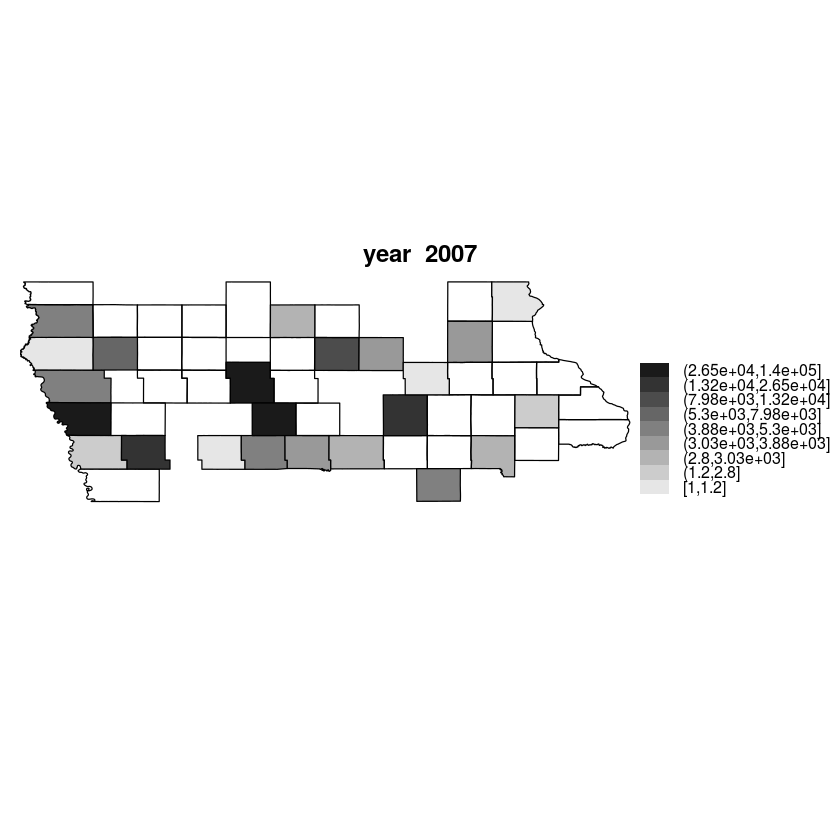

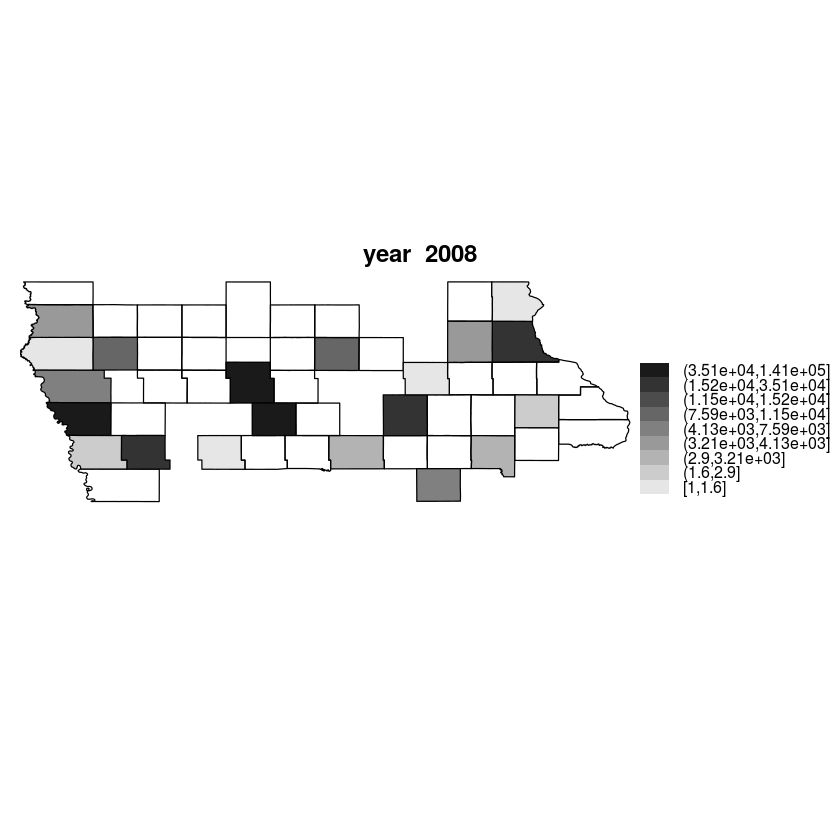

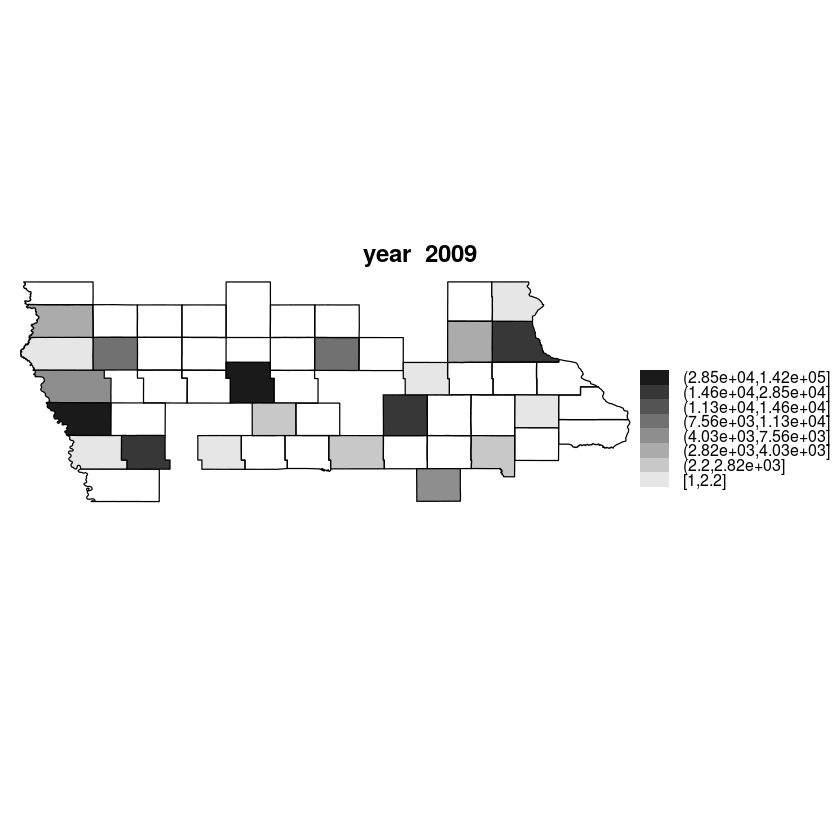

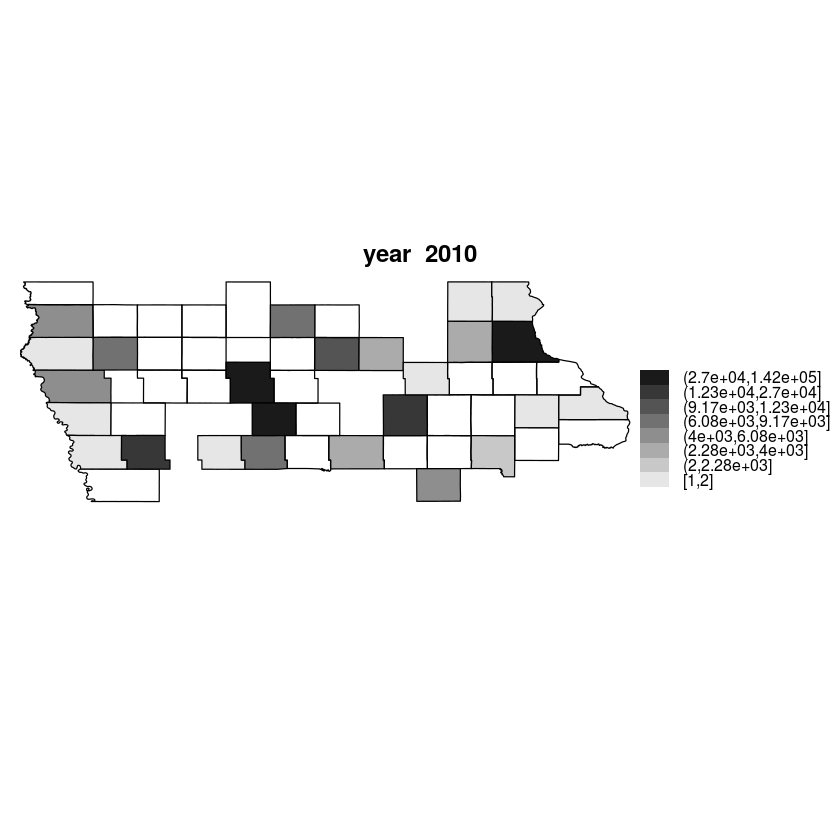

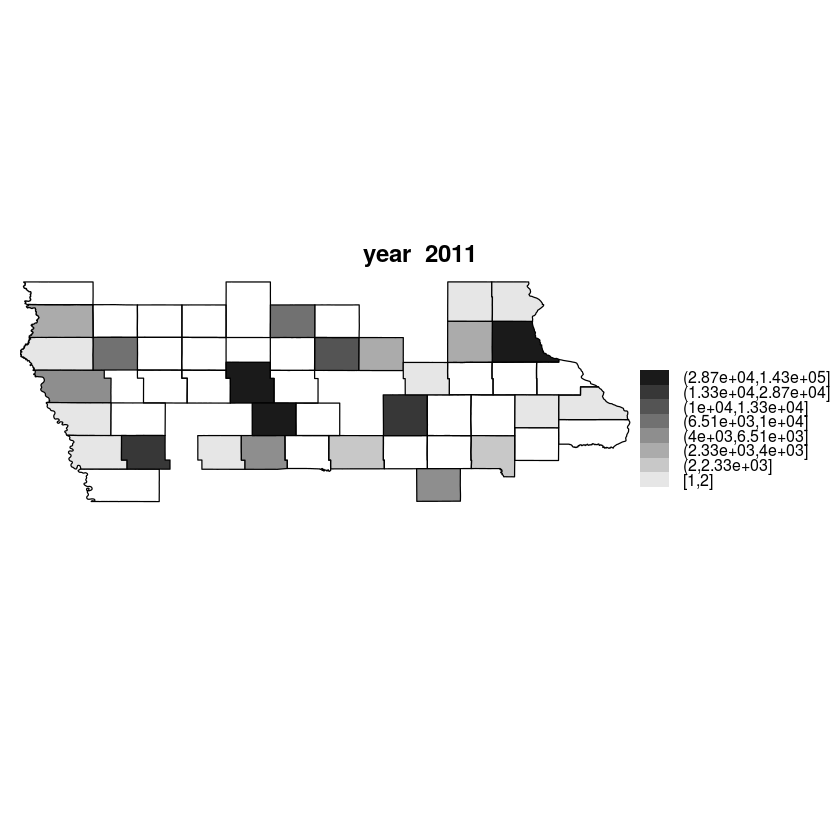

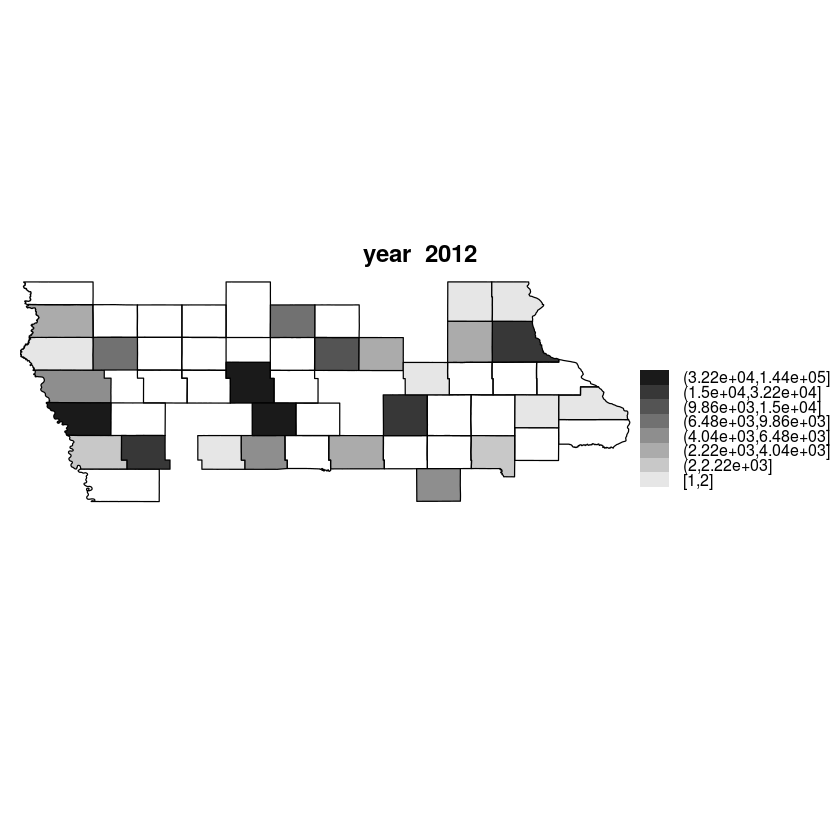

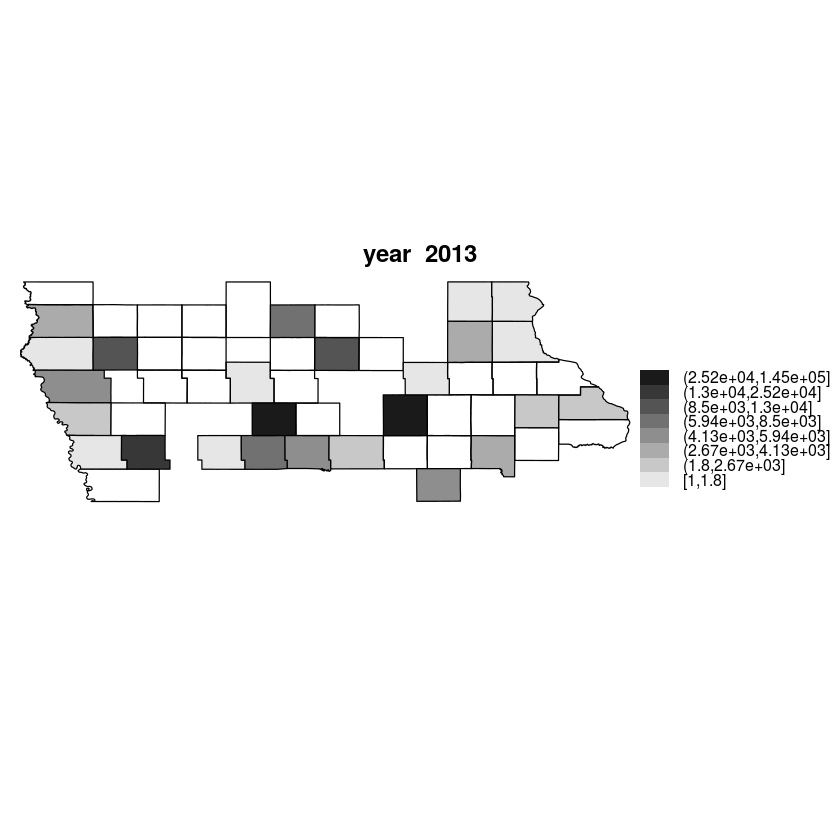

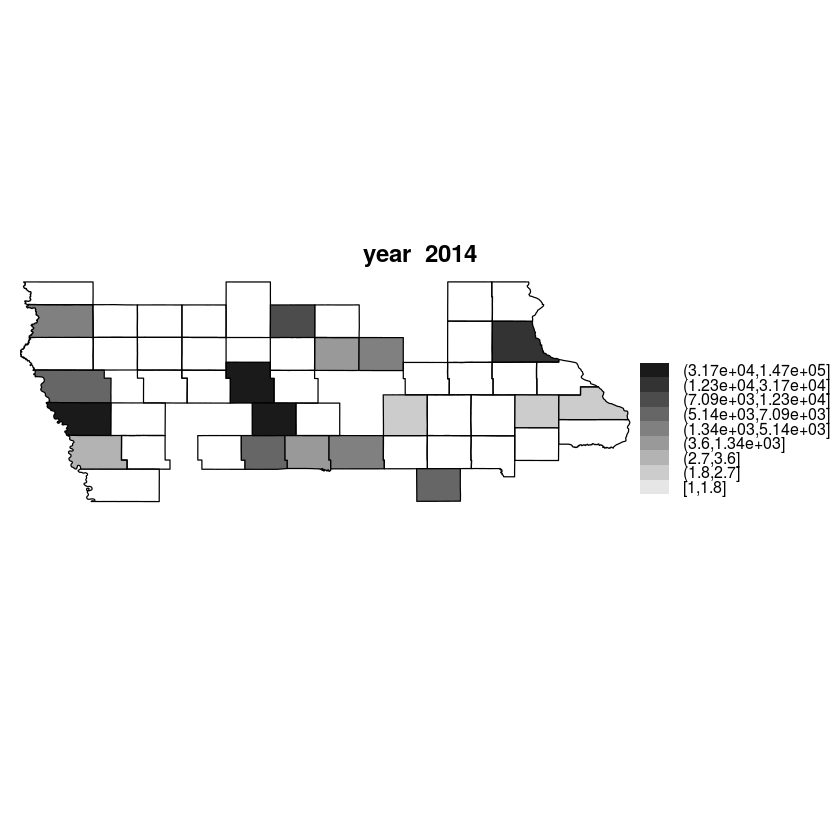

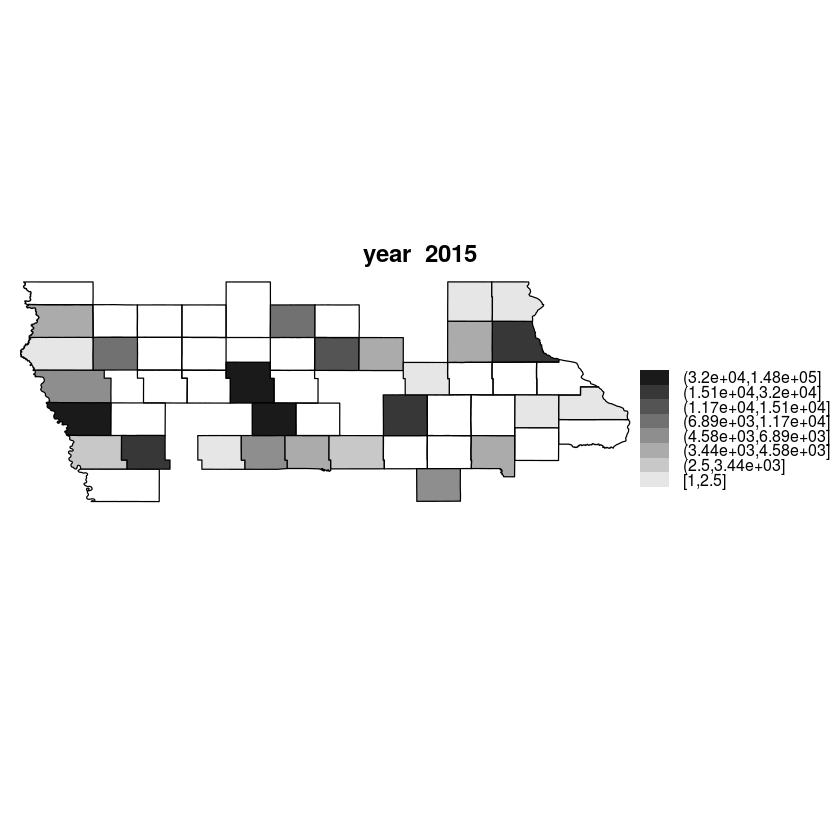

In [191]:
for (year in years){
    show_year(year)
}

In [213]:
subdf$diff <- subdf$landassessedvalue/(subdf$landassessedvalue+subdf$landmarketvalue)

In [226]:
head(subdf[!is.na(subdf$landassessedvalue) &  !is.na(subdf$landmarketvalue),])

assessmentyear taxratecodearea parcelid improvementmarketvalue
     structuretaxvaluedollarcnt totalassessedvalue taxamount taxvaluedollarcnt
     edition landassessedvalue taxdelinquencyyear totalmarketvalue
     improvementassessedvalue landtaxvaluedollarcnt landmarketvalue state
     county diff

In [227]:
subdf$diff <- subdf$improvementassessedvalue/(subdf$improvementmarketvalue+subdf$improvementassessedvalue)

In [229]:
head(subdf[!is.na(subdf$improvementassessedvalue) &  !is.na(subdf$improvementmarketvalue),])

assessmentyear taxratecodearea parcelid improvementmarketvalue
     structuretaxvaluedollarcnt totalassessedvalue taxamount taxvaluedollarcnt
     edition landassessedvalue taxdelinquencyyear totalmarketvalue
     improvementassessedvalue landtaxvaluedollarcnt landmarketvalue state
     county diff

In [254]:
show_year <-function (year){
    subdf <- df[df$assessmentyear==year,]
    subdf$diff <- subdf$landassessedvalue/(subdf$improvementassessedvalue+subdf$landassessedvalue)   
    subdf <- subdf[!is.na(subdf$diff),]
    dim(subdf)
    subdf$county <- substr(subdf$county,3,3+3)
    freq  <- aggregate(subdf[, c('diff')], list(subdf$county), mean,na.rm=TRUE, na.action = na.pass)
    colnames(freq) <- c("COUNTYFP",'freq')
    cat.cutoff=unique(quantile(unlist(freq$freq),probs = seq(0, 1, 0.1)))
    cat.lcs <- cut(unlist(freq$freq),breaks=cat.cutoff,include.lowest=TRUE)
    freq$freq_interv=cat.lcs
    #head(freq)
    
    ED <- map.one
    data.ED <- attr(ED, "data")
    attr(ED, "data") <- merge(data.ED, freq, by="COUNTYFP",all.x = TRUE)
    attr(ED,'plotOrder') <- head(ED@plotOrder,50)
    color.map=gray(seq(0.9,0.1,length=    length(cat.cutoff)-1))
    trellis.par.set(axis.line=list(col=NA))
    #spplot(obj=ED, zcol="freq",main="", col.regions=gray(99:0/99))
    a <- spplot(obj=ED, zcol="freq_interv",main=paste("year ", year), col.regions=color.map)    
    print(a)
}

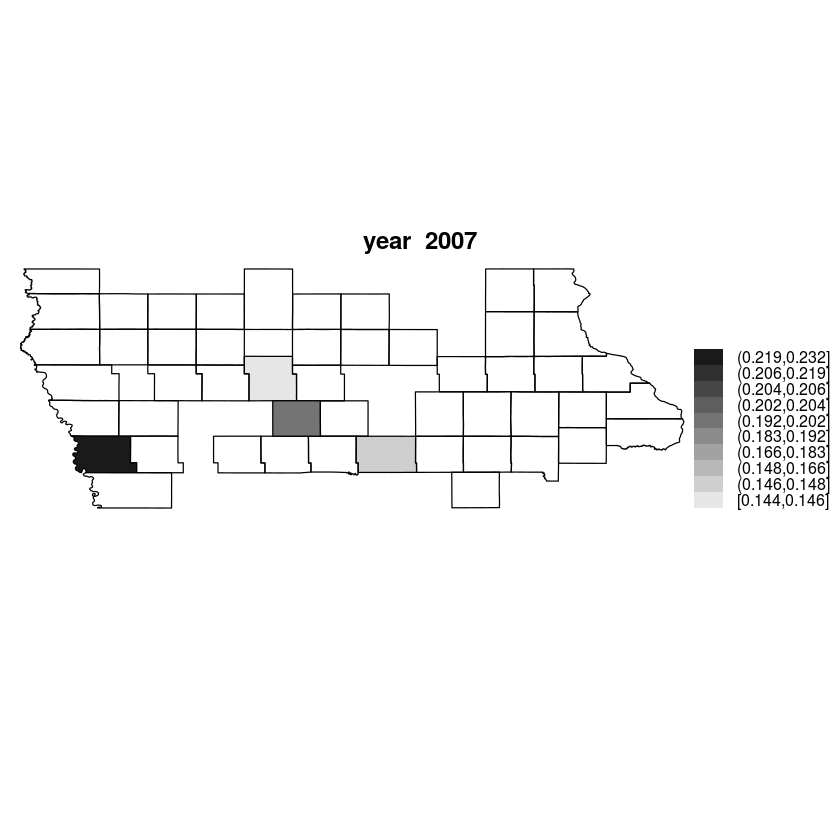

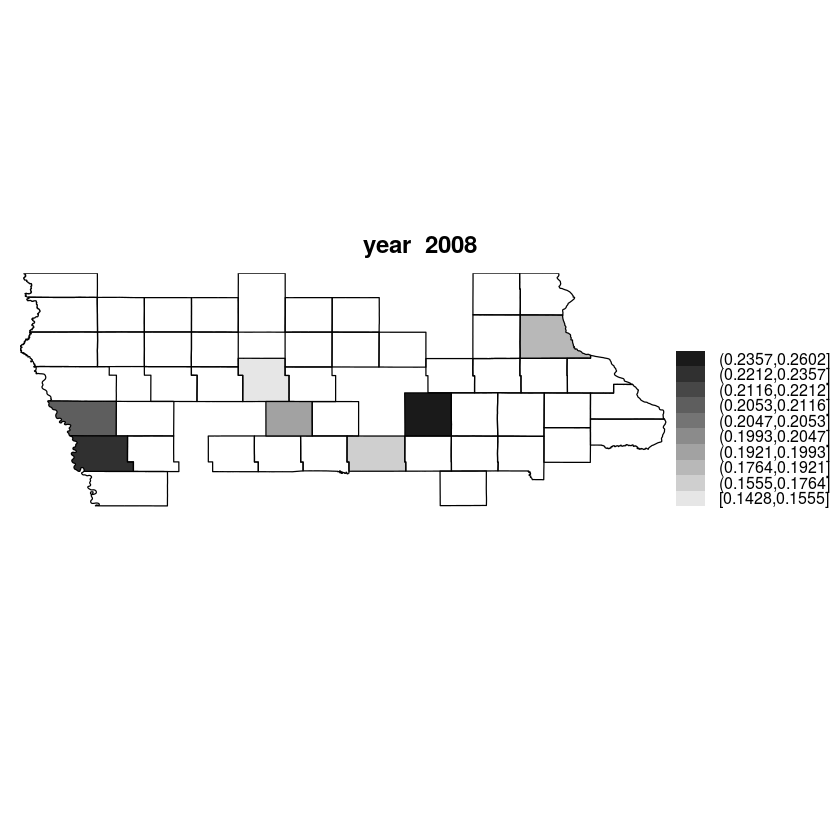

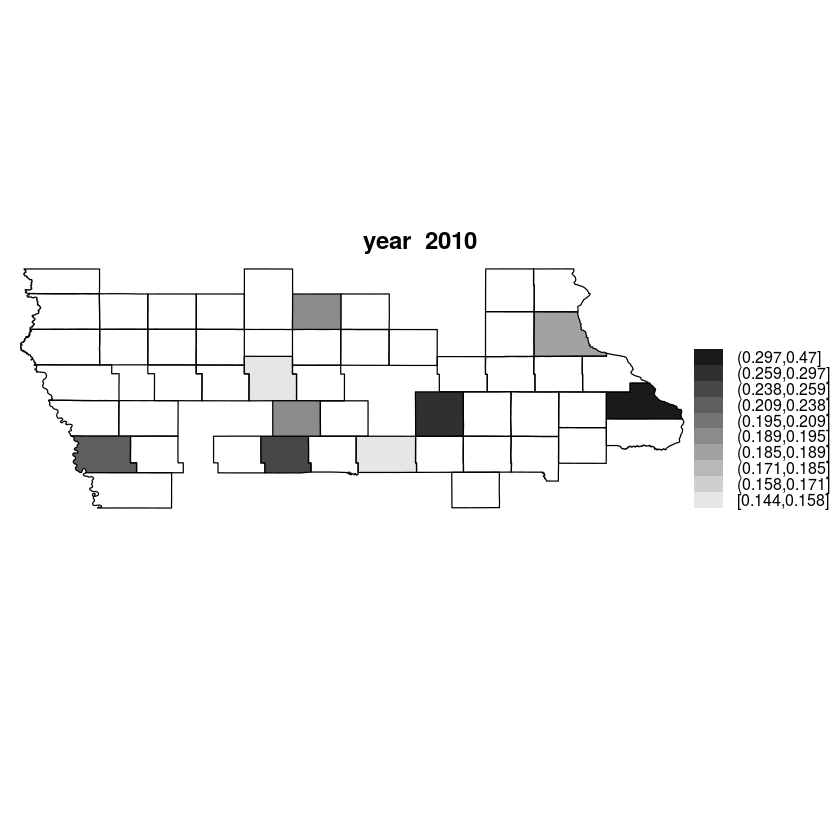

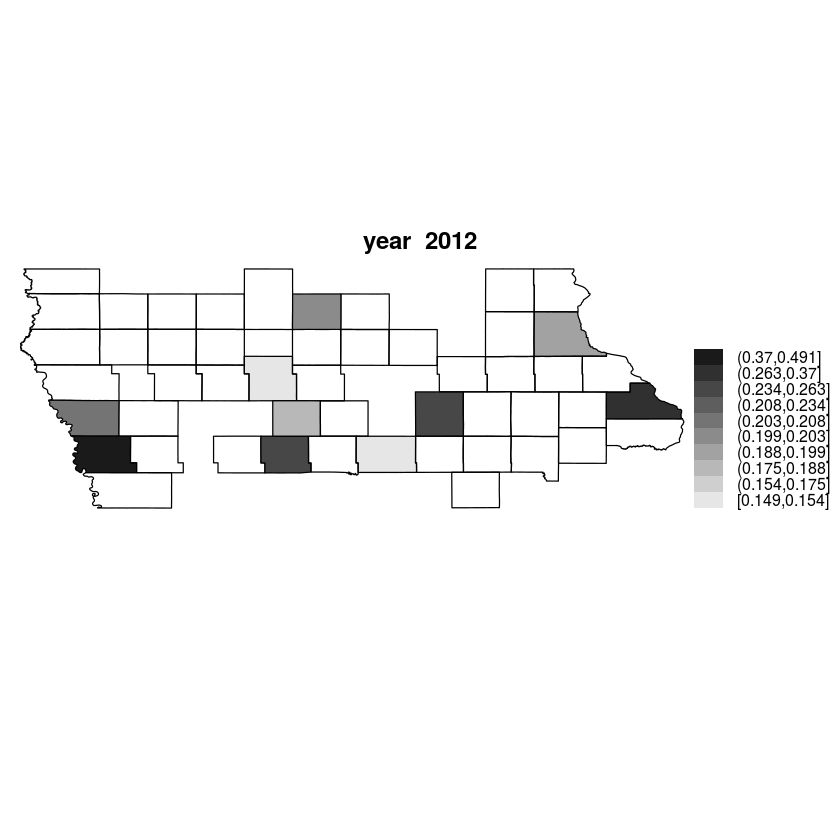

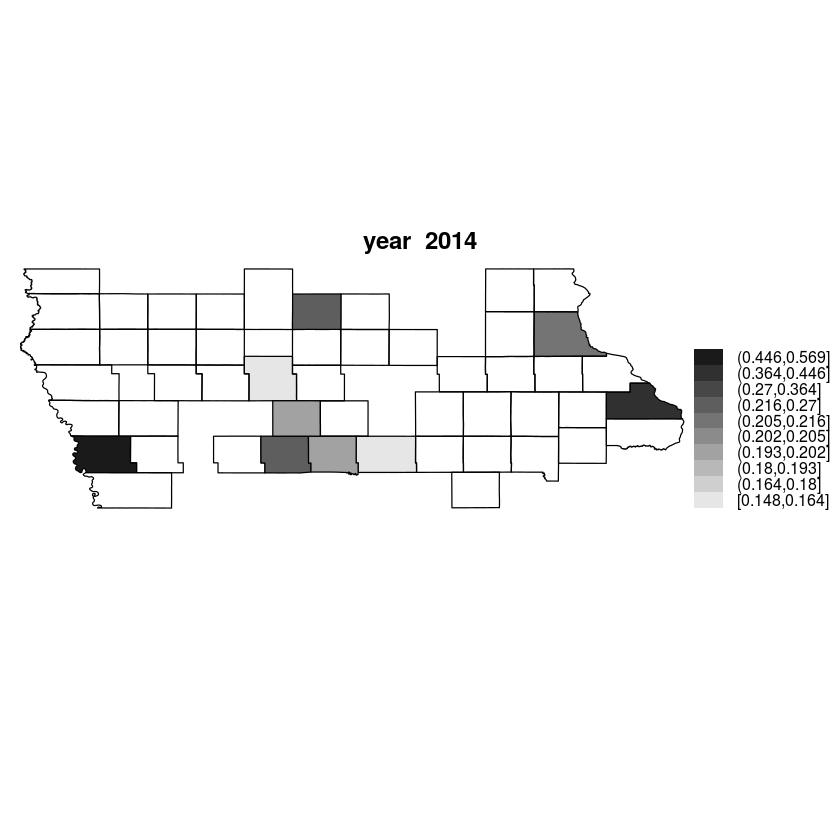

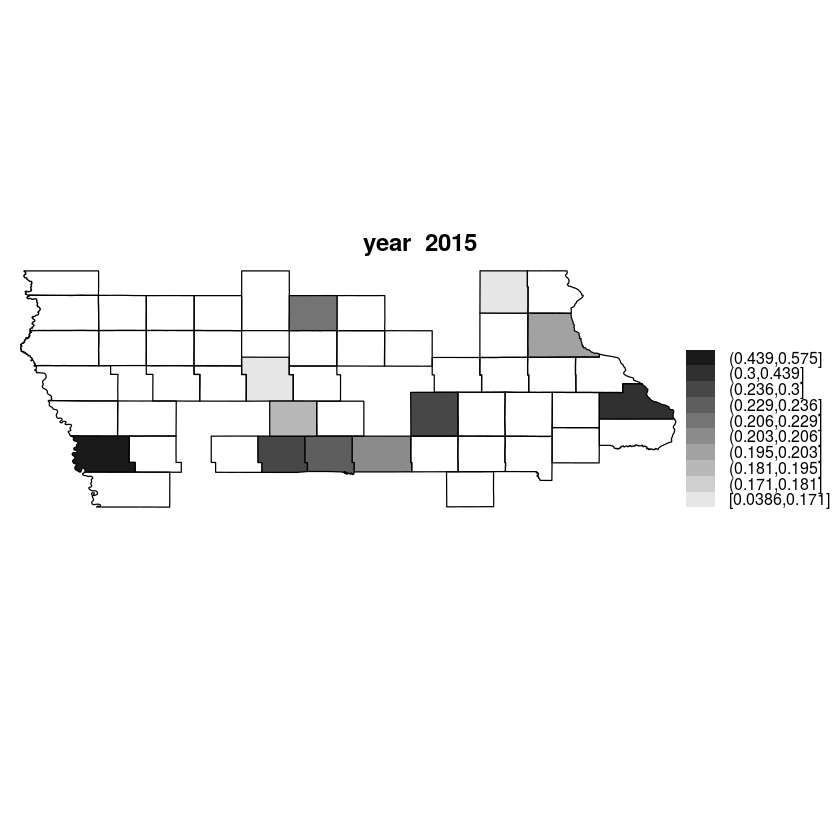

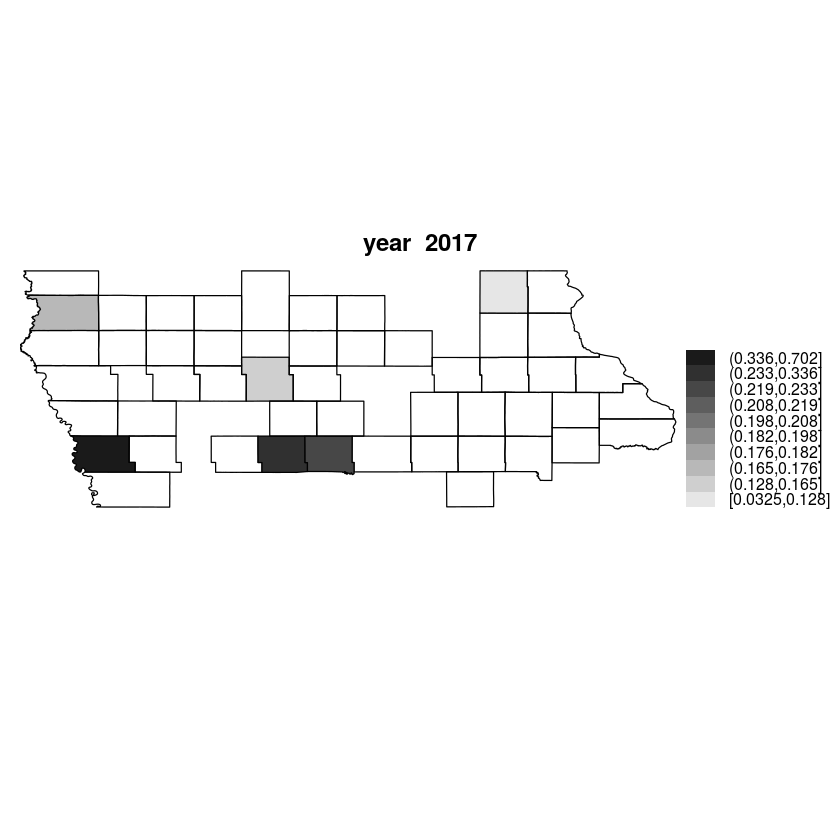

In [256]:
for (year in years){
    show_year(year)
}

In [269]:
show_year <-function (year){
    subdf <- df[df$assessmentyear==year,]
    subdf$diff <- subdf$landassessedvalue/(subdf$improvementassessedvalue+subdf$landassessedvalue)   
    subdf <- subdf[!is.na(subdf$diff),]
    dim(subdf)
    subdf$county <- substr(subdf$county,3,3+3)
    freq  <- aggregate(subdf[, c('diff')], list(subdf$county), sd,na.rm=TRUE )
    colnames(freq) <- c("COUNTYFP",'freq')
    cat.cutoff=unique(quantile(unlist(freq$freq),probs = seq(0, 1, 0.1),na.rm=TRUE))
    cat.lcs <- cut(unlist(freq$freq),breaks=cat.cutoff,include.lowest=TRUE)
    freq$freq_interv=cat.lcs
    #head(freq)
    
    ED <- map.one
    data.ED <- attr(ED, "data")
    attr(ED, "data") <- merge(data.ED, freq, by="COUNTYFP",all.x = TRUE)
    attr(ED,'plotOrder') <- head(ED@plotOrder,50)
    color.map=gray(seq(0.9,0.1,length=    length(cat.cutoff)-1))
    trellis.par.set(axis.line=list(col=NA))
    #spplot(obj=ED, zcol="freq",main="", col.regions=gray(99:0/99))
    a <- spplot(obj=ED, zcol="freq_interv",main=paste("year ", year), col.regions=color.map)    
    print(a)
}

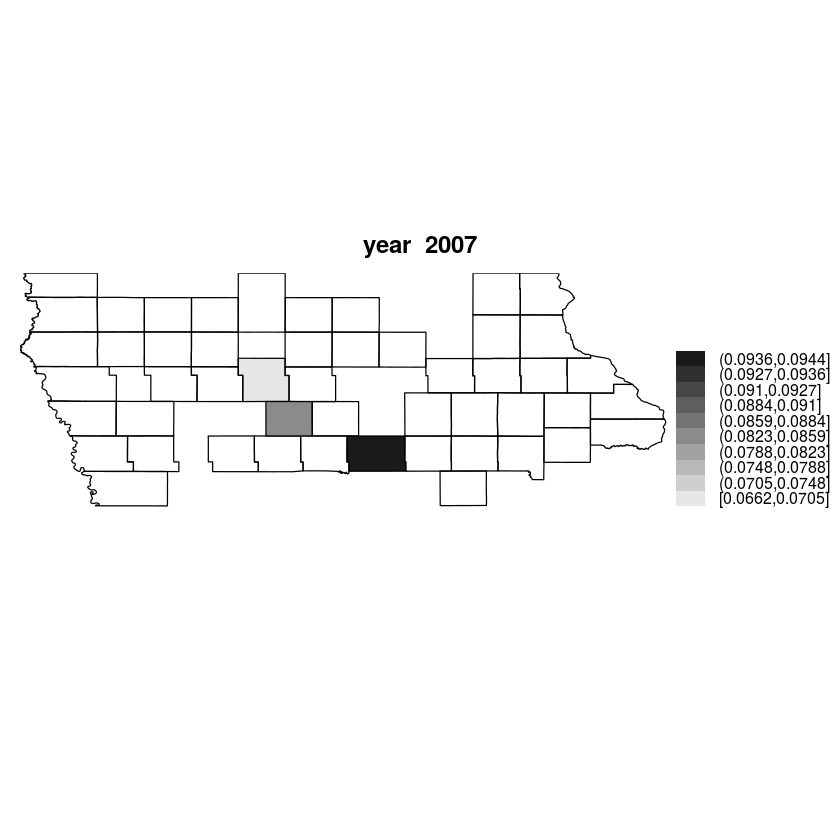

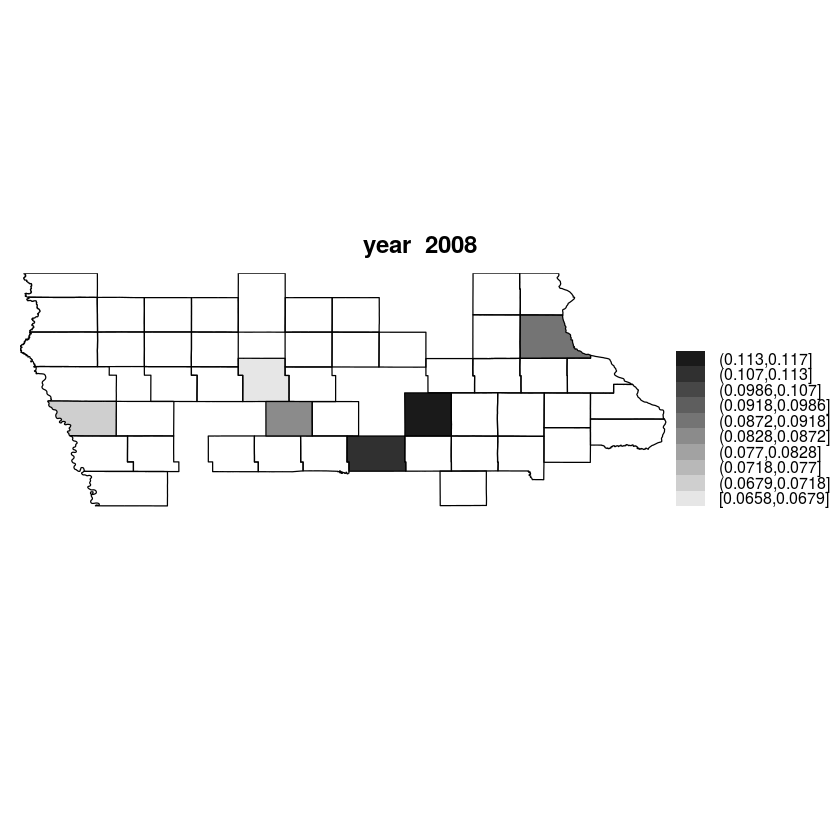

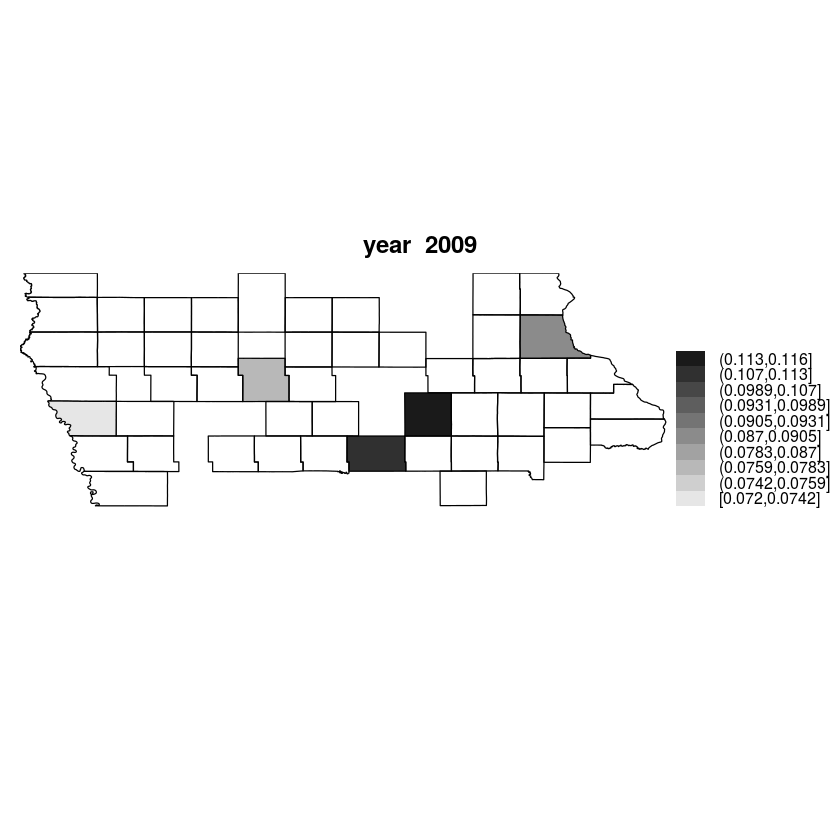

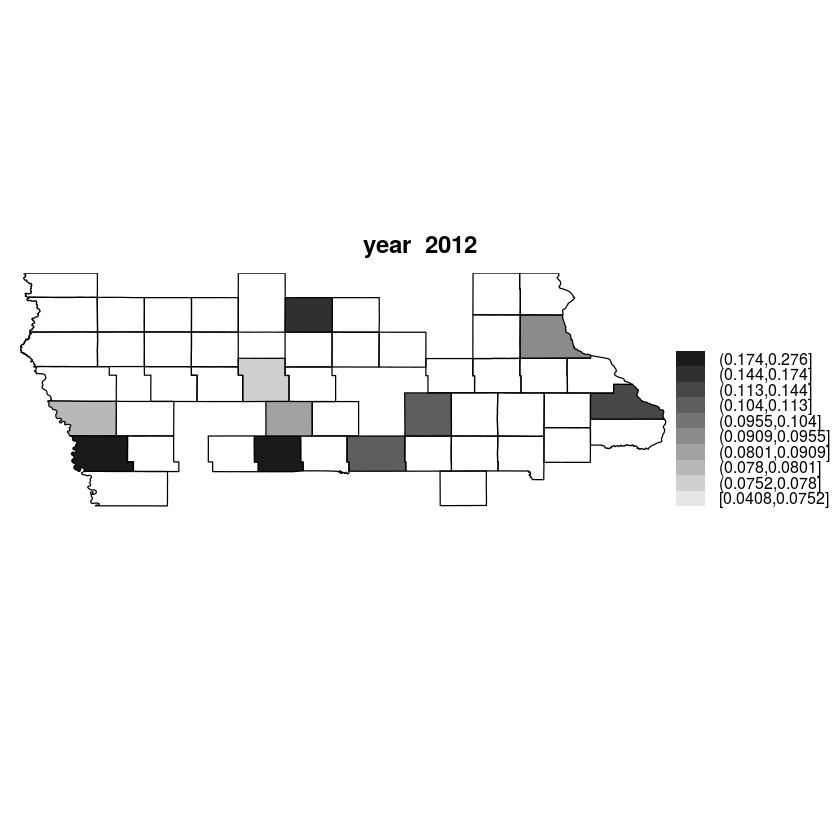

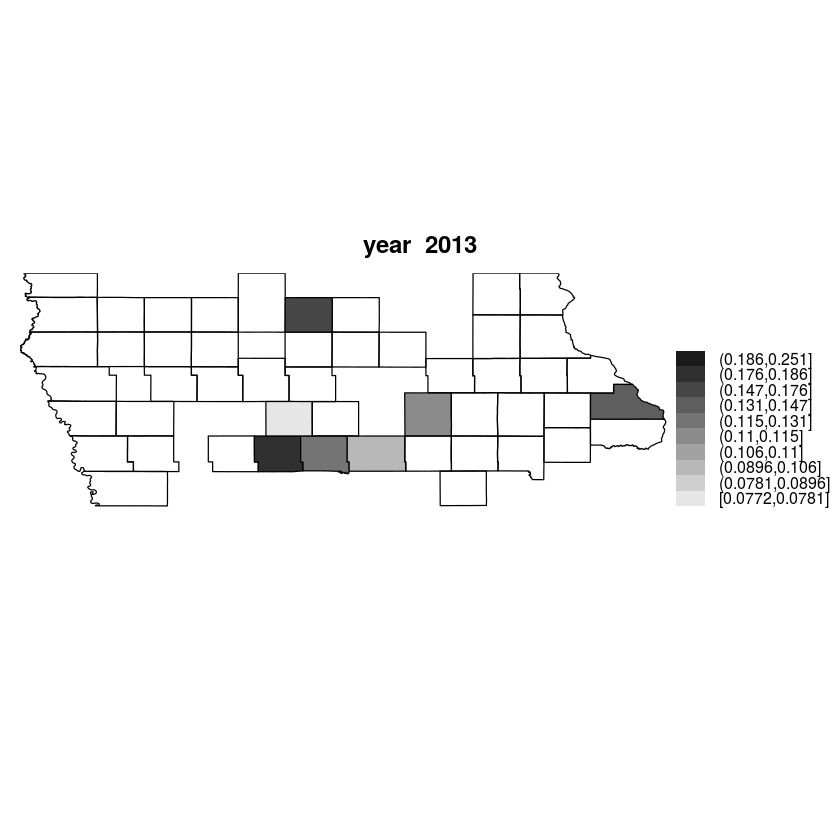

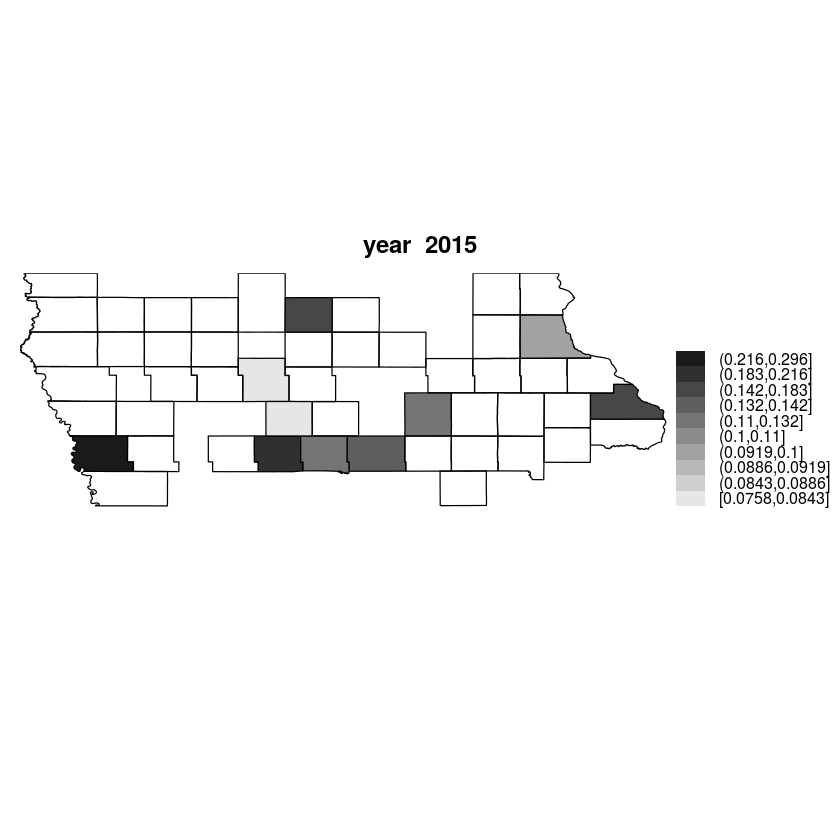

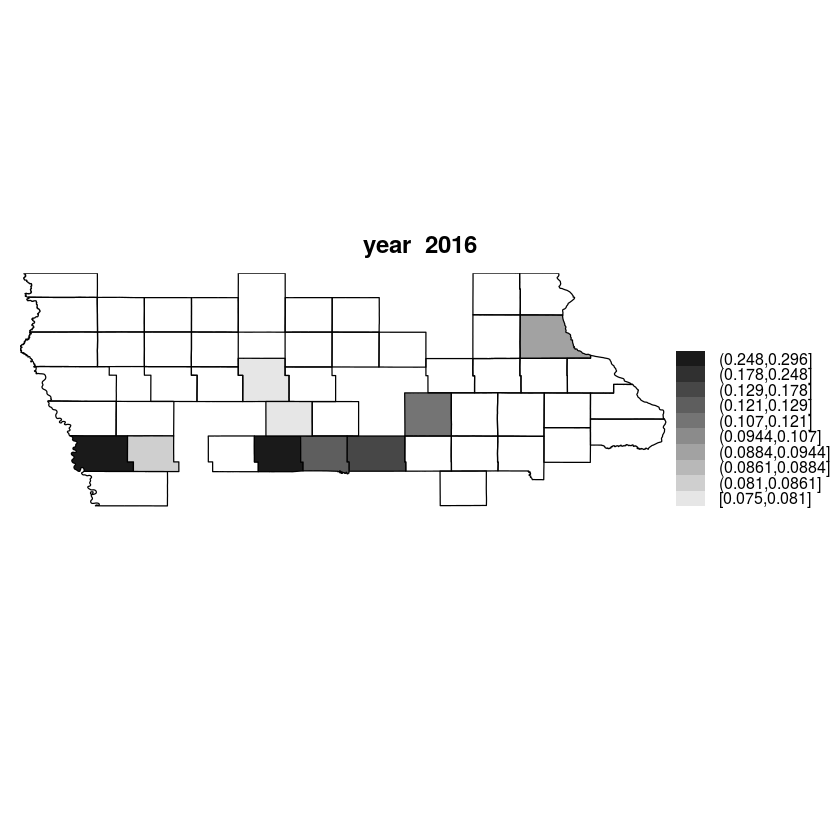

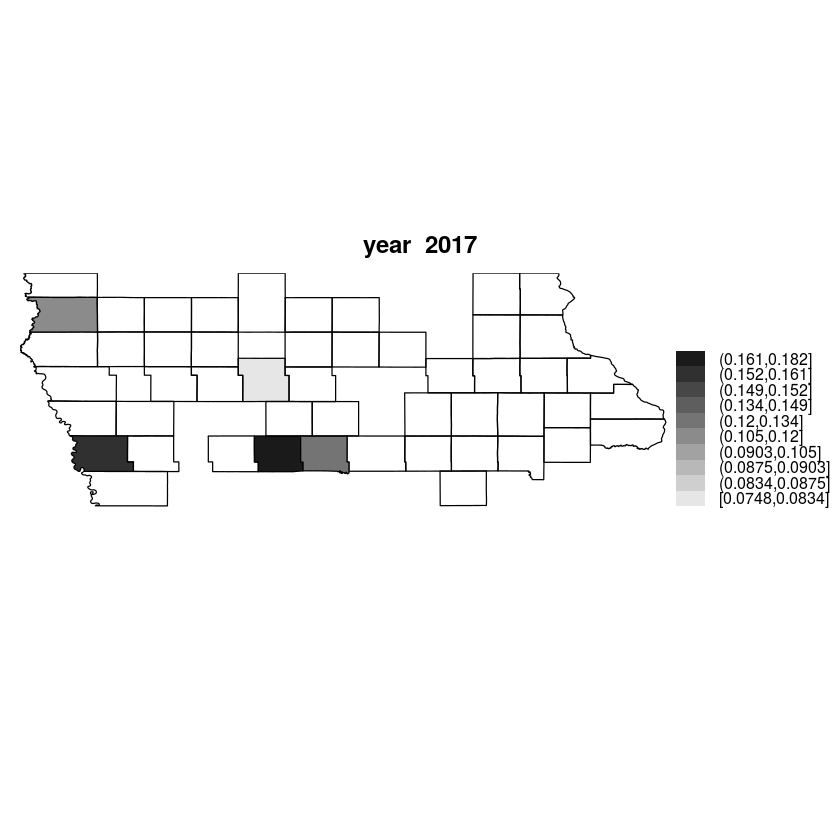

In [270]:
for (year in years){
    show_year(year)
}

In [286]:
show_year <-function (year){
    subdf <- df[df$assessmentyear==year,]
    subdf$diff <- subdf$landmarketvalue/(subdf$improvementmarketvalue+subdf$landmarketvalue)   
    subdf <- subdf[!is.na(subdf$diff),]
    #print(dim(subdf))
    if (dim(subdf)[1]==0) return(1)
    subdf$county <- substr(subdf$county,3,3+3)
    freq  <- aggregate(subdf[, c('diff')], list(subdf$county), mean,na.rm=TRUE, na.action = na.pass)
    colnames(freq) <- c("COUNTYFP",'freq')
    cat.cutoff=unique(quantile(unlist(freq$freq),probs = seq(0, 1, 0.1)))
    #print(cat.cutoff)
    if (length(cat.cutoff)<2) return (1)
    cat.lcs <- cut(unlist(freq$freq),breaks=cat.cutoff,include.lowest=TRUE)
    freq$freq_interv=cat.lcs
    #head(freq)
    
    ED <- map.one
    data.ED <- attr(ED, "data")
    attr(ED, "data") <- merge(data.ED, freq, by="COUNTYFP",all.x = TRUE)
    attr(ED,'plotOrder') <- head(ED@plotOrder,50)
    color.map=gray(seq(0.9,0.1,length=    length(cat.cutoff)-1))
    trellis.par.set(axis.line=list(col=NA))
    #spplot(obj=ED, zcol="freq",main="", col.regions=gray(99:0/99))
    a <- spplot(obj=ED, zcol="freq_interv",main=paste("year ", year), col.regions=color.map)    
    print(a)
}

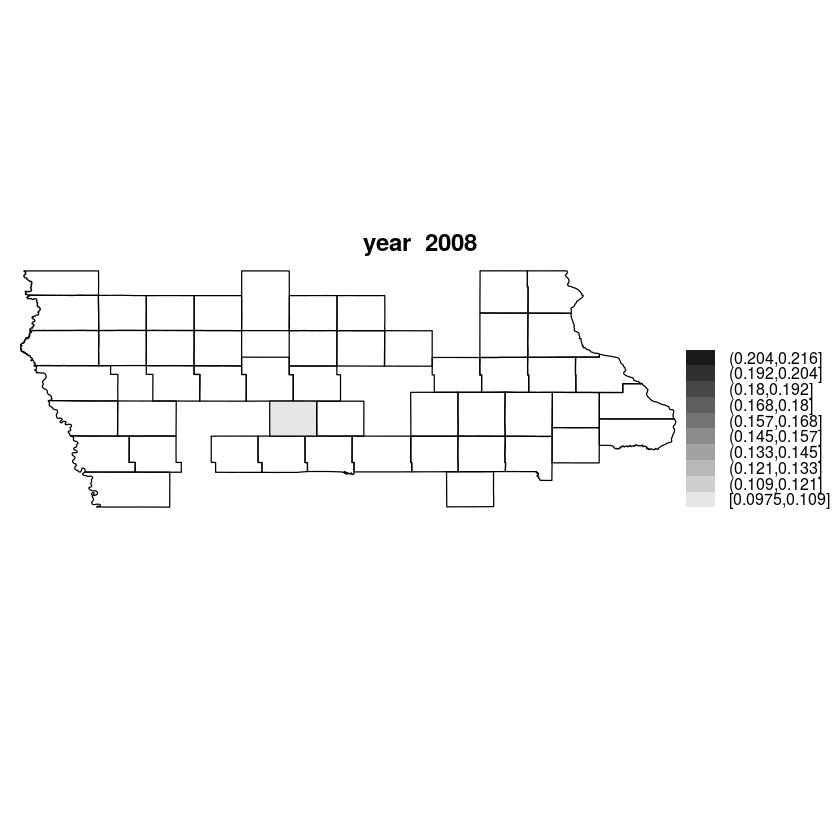

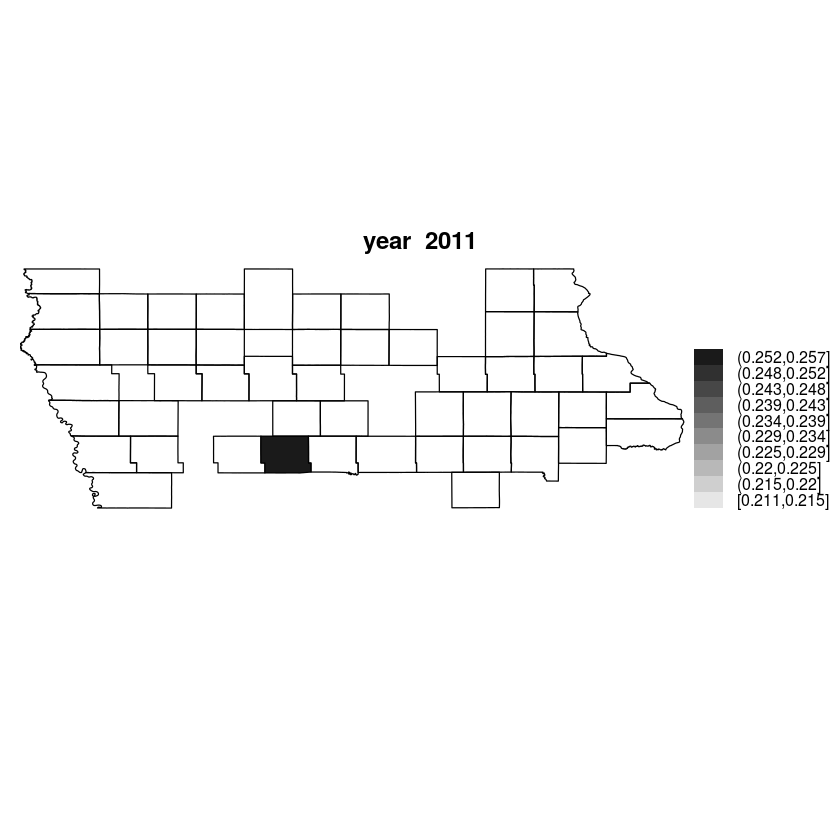

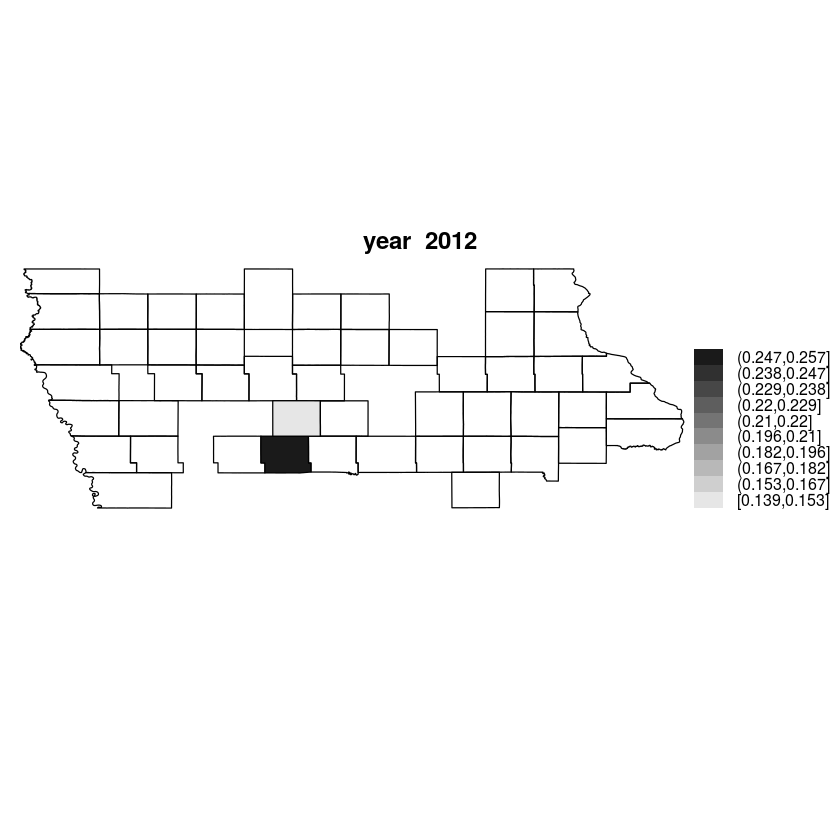

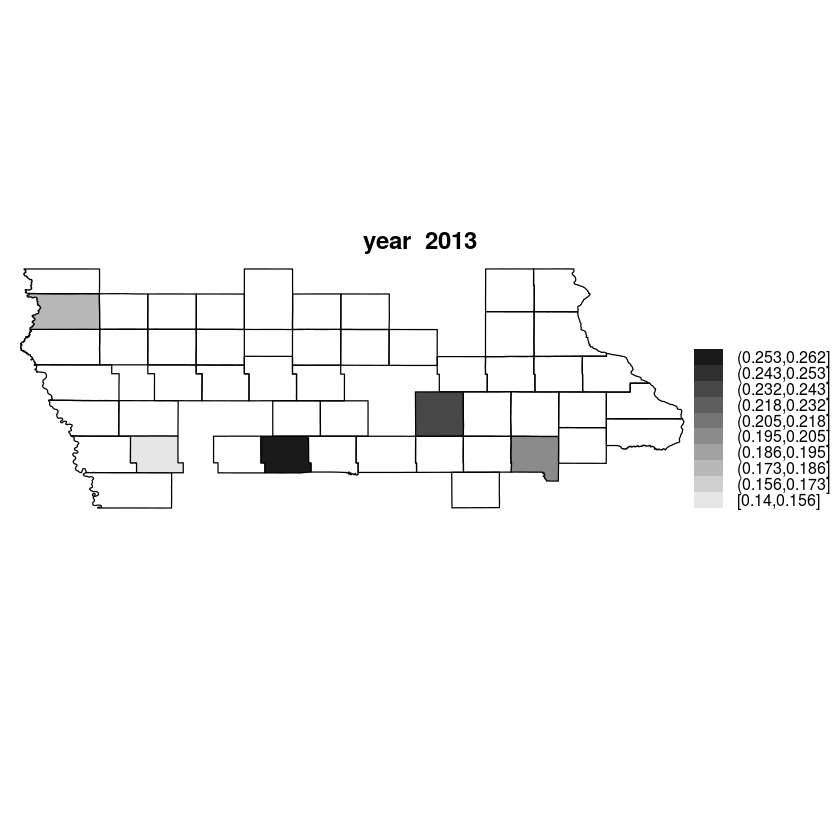

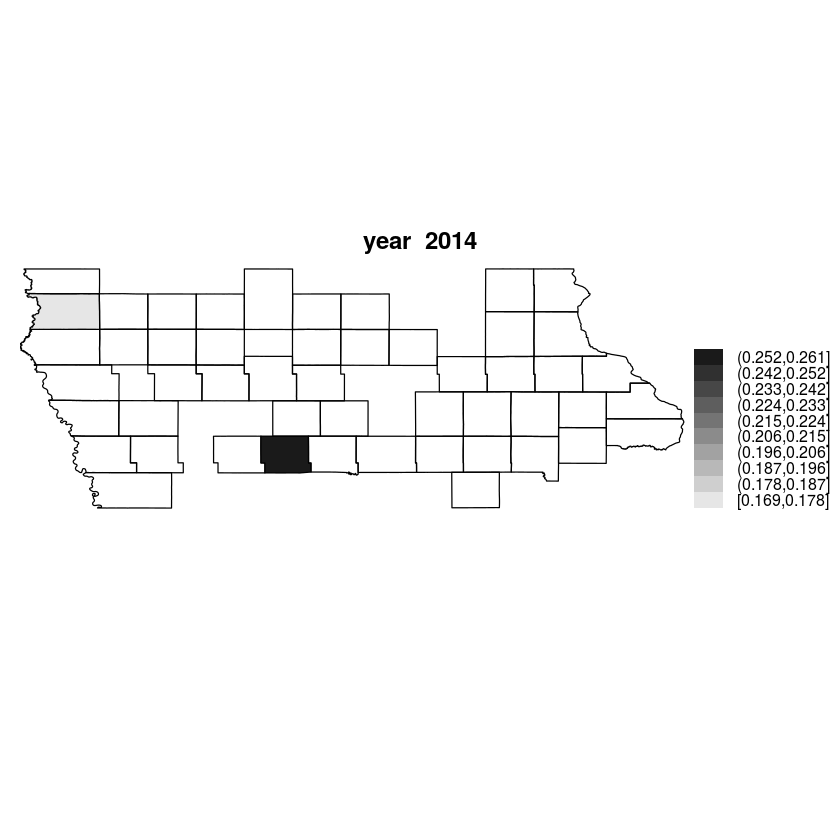

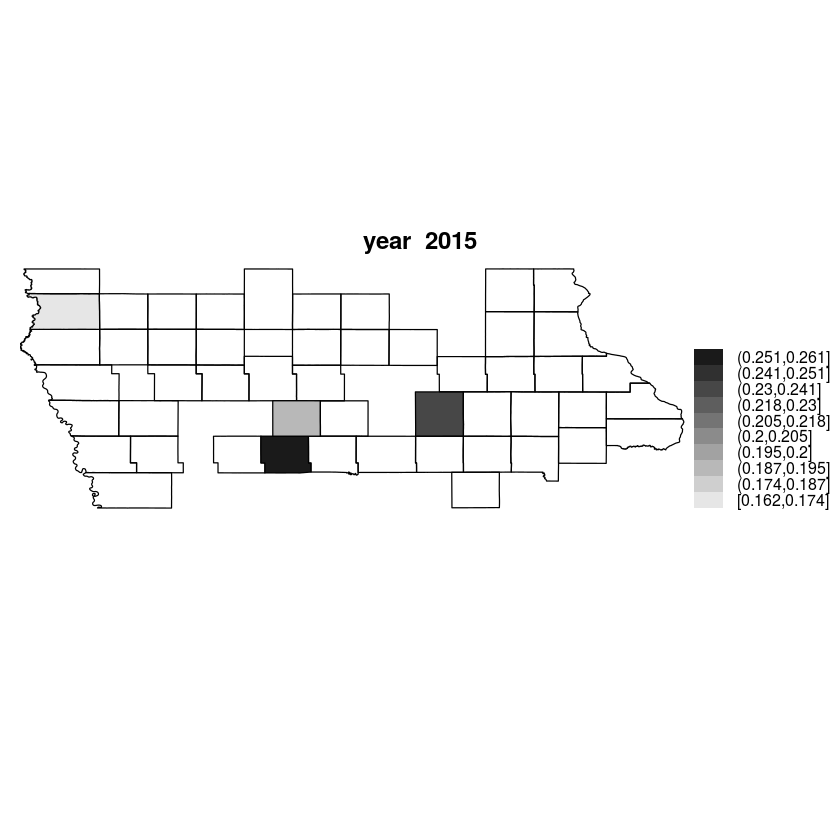

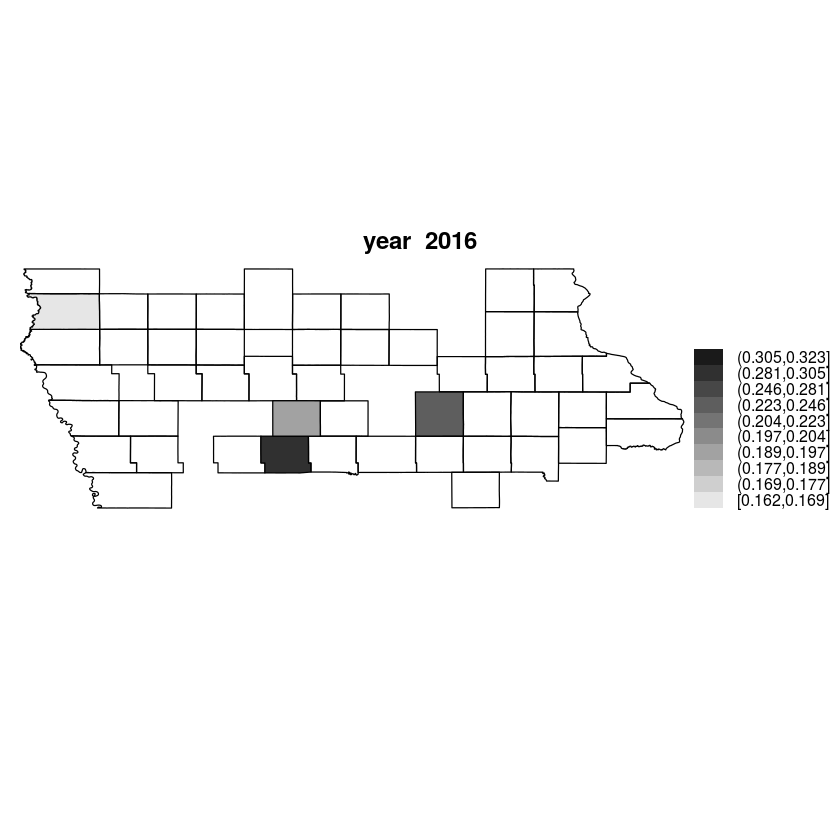

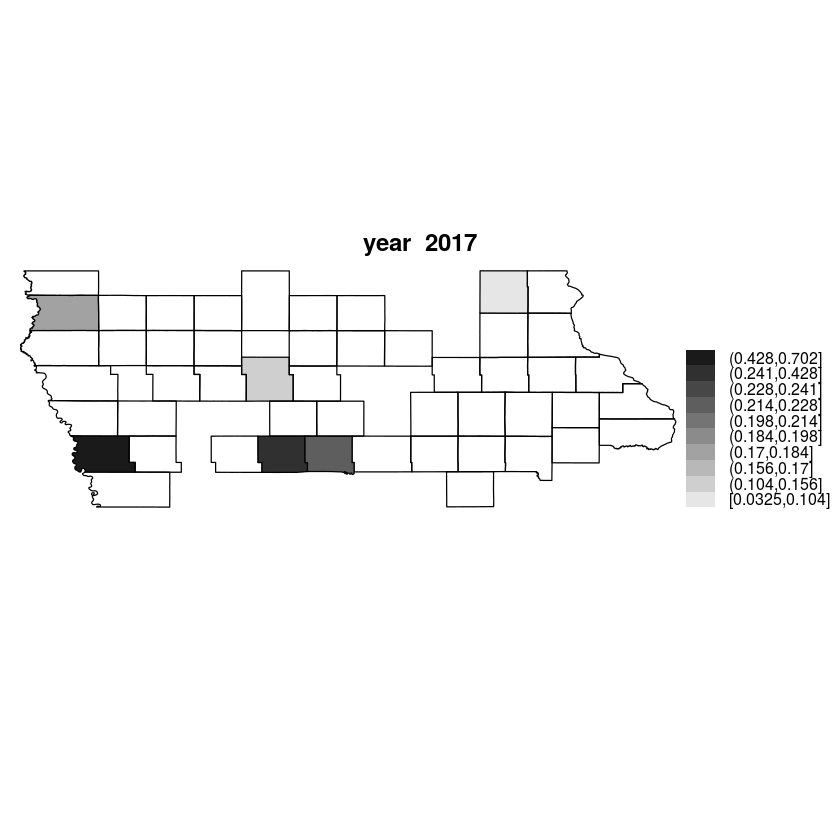

In [288]:
for (year in years){
    show_year(year)
}

In [278]:
dim(subdf)[1]

[1] 536509